In [1]:
import os
from PIL import Image
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [3]:
data = []
paths = []
result = []

for r, d, f in os.walk('data/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
result[0]

array([[1., 0.]])

In [4]:
paths = []
for r, d, f in os.walk("data/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(2891,2)
result.shape


(2891, 2)

In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(data, result, test_size=0.3, shuffle=True, random_state=1)

In [8]:
print('Train Images Shape', train_images.shape)
print('Train Labels Shape', train_labels.shape)
print('Test Images Shape', test_images.shape)
print('Test Labels Shape', test_labels.shape)

Train Images Shape (2023, 128, 128, 3)
Train Labels Shape (2023, 2)
Test Images Shape (868, 128, 128, 3)
Test Labels Shape (868, 2)


In [9]:
inputs = tf.keras.Input(shape=(128, 128, 3))

conv2d_layer = tf.keras.layers.Conv2D(32, (2,2), padding='Same')(inputs)
conv2d_layer = tf.keras.layers.Conv2D(32, (2,2), activation='relu', padding='Same')(conv2d_layer)

bn_layer = tf.keras.layers.BatchNormalization()(conv2d_layer)
mp_layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(bn_layer)
drop = tf.keras.layers.Dropout(0.25)(mp_layer)

conv2d_layer = tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='Same')(drop)
conv2d_layer = tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='Same')(conv2d_layer)

bn_layer = tf.keras.layers.BatchNormalization()(conv2d_layer)
mp_layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(bn_layer)
drop = tf.keras.layers.Dropout(0.25)(mp_layer)

flatten_layer = tf.keras.layers.Flatten()(drop)

dense_layer = tf.keras.layers.Dense(512, activation='relu')(flatten_layer)
drop = tf.keras.layers.Dropout(0.5)(dense_layer)
outputs = tf.keras.layers.Dense(2, activation='softmax')(drop)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='bt_model')
model.summary()

Model: "bt_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        825

In [10]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adamax(),
             metrics = ['accuracy'])

In [11]:
history = model.fit(train_images, train_labels,
                   epochs=10,
                   batch_size=16,
                   validation_data=(test_images, test_labels))

Epoch 1/10
127/127 [==============================] - 14s 96ms/step - loss: 13.5526 - accuracy: 0.7196 - val_loss: 1.3591 - val_accuracy: 0.8594
Epoch 2/10
127/127 [==============================] - 11s 89ms/step - loss: 0.8484 - accuracy: 0.8800 - val_loss: 0.8528 - val_accuracy: 0.8790
Epoch 3/10
127/127 [==============================] - 11s 88ms/step - loss: 0.6880 - accuracy: 0.9011 - val_loss: 0.4303 - val_accuracy: 0.9067
Epoch 4/10
127/127 [==============================] - 11s 87ms/step - loss: 0.2739 - accuracy: 0.9455 - val_loss: 0.2843 - val_accuracy: 0.9435
Epoch 5/10
127/127 [==============================] - 11s 87ms/step - loss: 0.1034 - accuracy: 0.9703 - val_loss: 0.2800 - val_accuracy: 0.9482
Epoch 6/10
127/127 [==============================] - 11s 88ms/step - loss: 0.0689 - accuracy: 0.9764 - val_loss: 0.2408 - val_accuracy: 0.9505
Epoch 7/10
127/127 [==============================] - 11s 87ms/step - loss: 0.0618 - accuracy: 0.9782 - val_loss: 0.1963 - val_accuracy

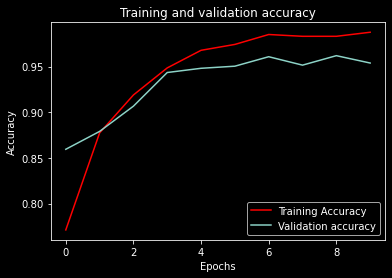

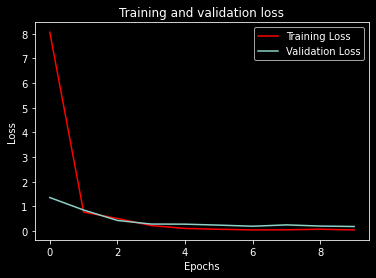

In [12]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot  ( epochs,     acc ,'r', label= 'Training Accuracy')
plt.plot  ( epochs, val_acc, label='Validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot  ( epochs,     loss ,'r', label= 'Training Loss' )
plt.plot  ( epochs, val_loss , label= 'Validation Loss')
plt.title ('Training and validation loss'   )
plt.legend()

In [13]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


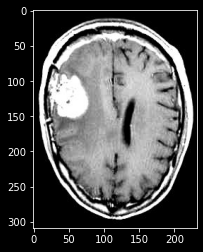

In [14]:
from matplotlib.pyplot import imshow
img = Image.open("data/yes/y2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is No, Its not a tumor


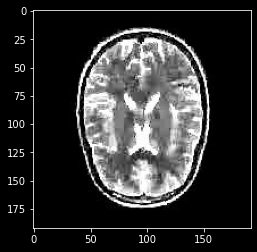

In [15]:
img = Image.open("data/no/no2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))